Notebook for testing nn performance

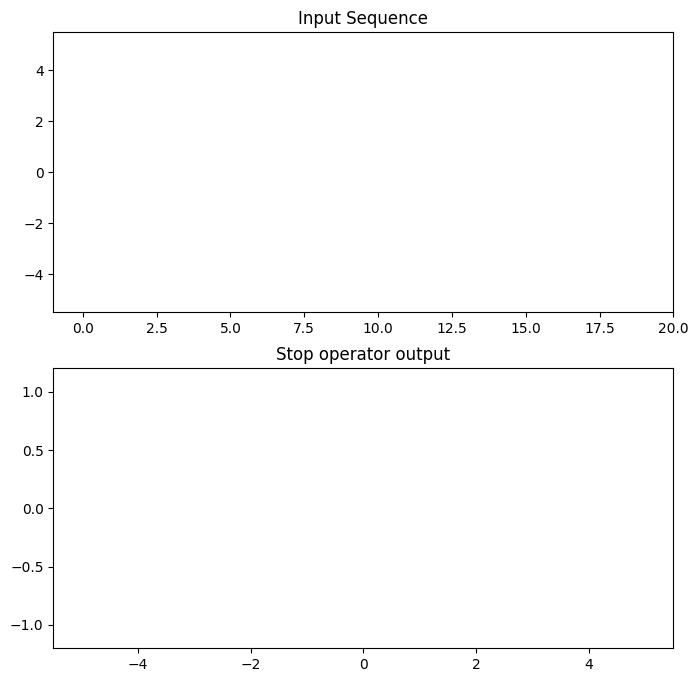

In [1]:
# import dependencies
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from data_preprocessing import extract_csv_info, format_data, shuffle_and_split, split_input_output, extract_csv_info_datasets_folder
from neural import train_and_generate_feedforward_network, train_and_generate_recurrent_network, train_and_generate_preisach_network, train_and_generate_recurrent_preisach_network

In [2]:
# Function to compute MSE of predicted values
def compute_mse(actual_y, predicted_y):
    actual_y = np.asarray(actual_y)
    predicted_y = np.asarray(predicted_y)
    diff = np.subtract(actual_y, predicted_y)
    squared = np.square(diff)
    mse = np.mean(squared)
    return mse


# test compute mse
# y = [11, 20, 19, 17, 10]
# y_pred = [12, 18, 19.5, 18, 9]
# print(compute_mse(y, y_pred))

In [3]:
# Function for plotting predicted values from NN
# TODO: add figsize and xlim as input to function to allow customization
def plot_predicted(next_h, next_b, model_name):
    plt.figure(figsize=(20, 12))
    plt.xlim(-750, 750)
    plt.plot(next_h, next_b, marker="o", color='black')
    plt.title(model_name + " Output Plot")
    plt.xlabel("Magnetic Field H (T)")
    plt.ylabel("Magnetic Flux B (A/m)")
    plt.show()

## Data Loading and Preprocessing

In [4]:
# Load data for training
# raw_train_data = extract_csv_info("./data_simulated/M19_29Gauge - Sheet1.csv")
raw_train_data = extract_csv_info_datasets_folder("./datasets/HB_Comb.csv")
# format into (current H, current B, next H, next B)
formatted_data = format_data(raw_train_data)
#train, test = shuffle_and_split(formatted_data)
train_x, train_y = split_input_output(formatted_data)
#test_x, test_y = split_input_output(test)
print(len(train_x))

3563


In [6]:
# Load data for testing
raw_test_data = extract_csv_info_datasets_folder("./datasets/HB1.csv")
formatted_test_data = format_data(raw_test_data)
test_x, test_y = split_input_output(formatted_test_data)

# Separate next_h values into separate list for plotting output
test_next_h = list()
for i in range(len(test_x)):
    test_next_h.append(test_x[i][2])

print(len(test_next_h))
print(len(test_x))

1187
1187


## Recurrent Preisach NN

In [10]:
# Generate and train recurrent preisach network
n = 30
rpnn_model = train_and_generate_recurrent_preisach_network(train_x[0:3552], train_y[0:3552], "recurrent_preisach.model", n_epochs=n)

Epoch 1/30
111/111 [==============================] - 23s 103ms/step - loss: 0.9301 - mean_squared_error: 0.9301
Epoch 2/30
111/111 [==============================] - 11s 101ms/step - loss: 0.9121 - mean_squared_error: 0.9121
Epoch 3/30
111/111 [==============================] - 11s 103ms/step - loss: 0.9074 - mean_squared_error: 0.9074
Epoch 4/30
111/111 [==============================] - 12s 107ms/step - loss: 0.9256 - mean_squared_error: 0.9256
Epoch 5/30
111/111 [==============================] - 11s 101ms/step - loss: 0.9013 - mean_squared_error: 0.9013
Epoch 6/30
111/111 [==============================] - 12s 104ms/step - loss: 0.8957 - mean_squared_error: 0.8957
Epoch 7/30
111/111 [==============================] - 12s 104ms/step - loss: 0.8973 - mean_squared_error: 0.8973
Epoch 8/30
111/111 [==============================] - 12s 104ms/step - loss: 0.8887 - mean_squared_error: 0.8887
Epoch 9/30
111/111 [==============================] - 12s 105ms/step - loss: 0.9053 - mean_squar

36/36 [==============================] - 3s 44ms/step


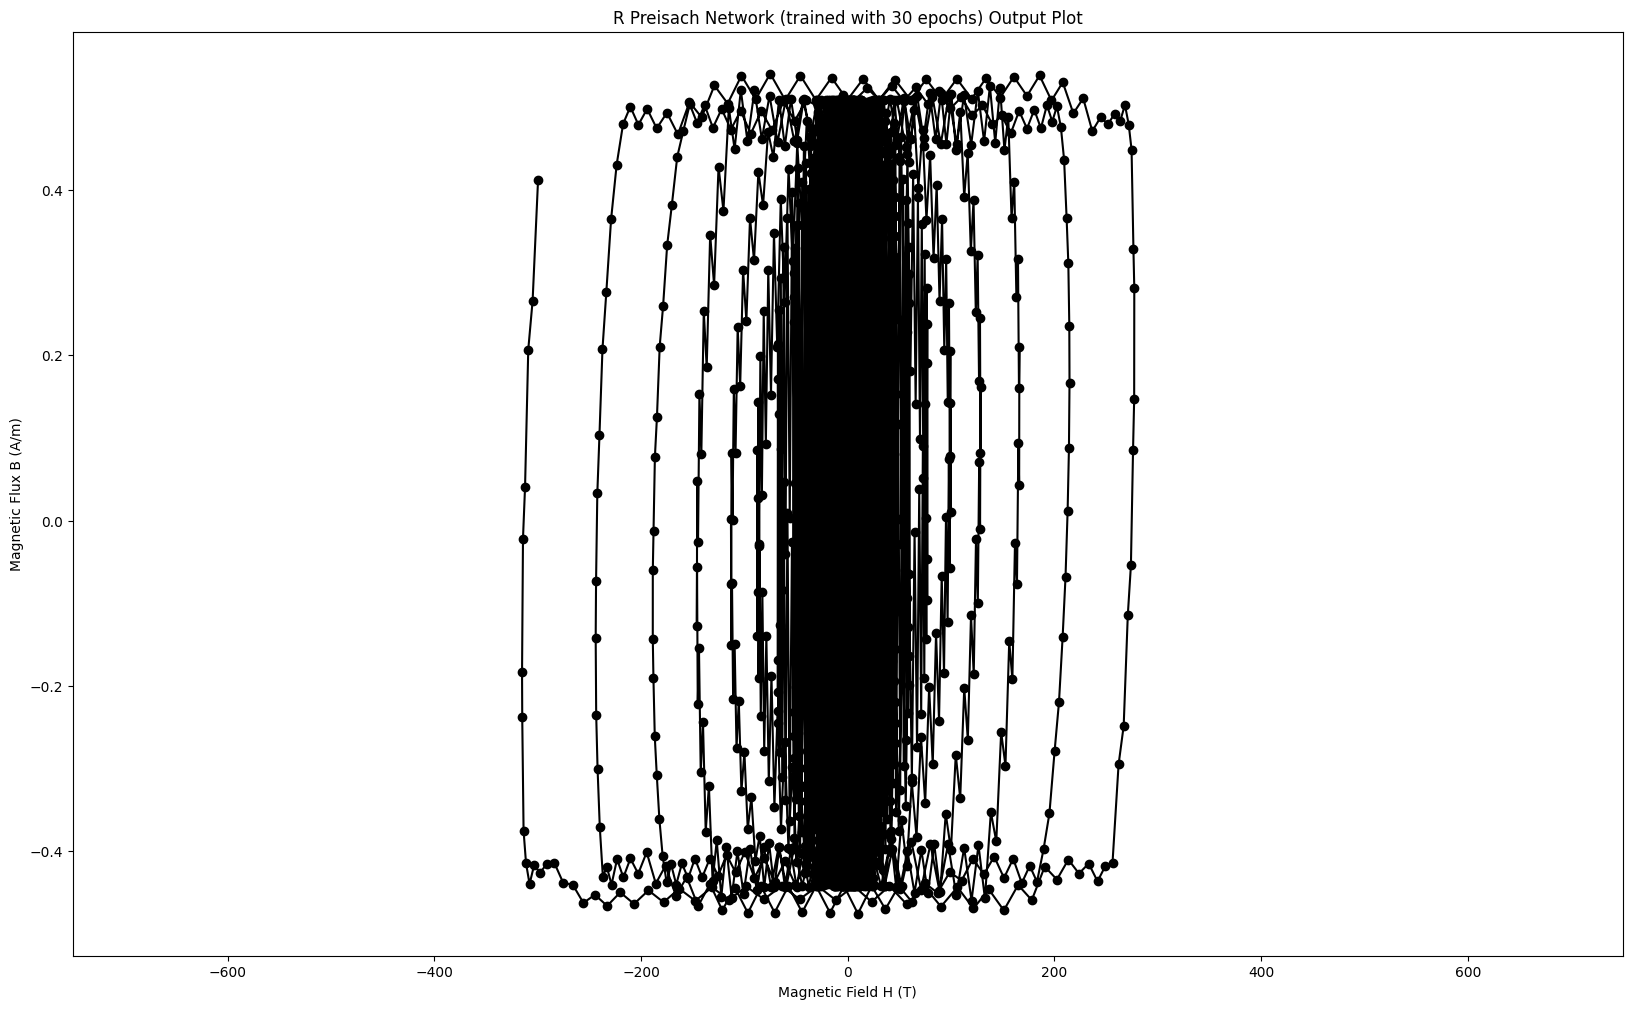

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (32, 1)                   4         
                                                                 
 recurrent_preisach_layer3_2  (32, 10)                 40        
  (RecurrentPreisachLayer3)                                      
                                                                 
 dense_7 (Dense)             (32, 10)                  110       
                                                                 
 dense_8 (Dense)             (32, 1)                   11        
                                                                 
Total params: 165
Trainable params: 145
Non-trainable params: 20
_________________________________________________________________


In [11]:
# Evaluate and generate a plot of the RPNN
rpnn_prediction = rpnn_model.predict(test_x[0:1152])
plot_predicted(test_next_h[0:1152], rpnn_prediction[0:1152], "R Preisach Network (trained with {} epochs)".format(n))
rpnn_model.summary()

## Feedforward Network

In [12]:
# Generate and train feedforward network
feedforward_model = train_and_generate_feedforward_network(train_x, train_y, "feedforward.model", n_epochs=20)

Epoch 1/20
112/112 [==============================] - 1s 5ms/step - loss: 0.6359 - mean_squared_error: 0.6359
Epoch 2/20
112/112 [==============================] - 0s 4ms/step - loss: 0.1892 - mean_squared_error: 0.1892
Epoch 3/20
112/112 [==============================] - 0s 4ms/step - loss: 0.0792 - mean_squared_error: 0.0792
Epoch 4/20
112/112 [==============================] - 0s 3ms/step - loss: 0.0527 - mean_squared_error: 0.0527
Epoch 5/20
112/112 [==============================] - 0s 4ms/step - loss: 0.0448 - mean_squared_error: 0.0448
Epoch 6/20
112/112 [==============================] - 0s 4ms/step - loss: 0.0376 - mean_squared_error: 0.0376
Epoch 7/20
112/112 [==============================] - 1s 5ms/step - loss: 0.0336 - mean_squared_error: 0.0336
Epoch 8/20
112/112 [==============================] - 0s 4ms/step - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 9/20
112/112 [==============================] - 0s 3ms/step - loss: 0.0248 - mean_squared_error: 0.0248
Epoch 10/2

In [13]:
# Load feedforward model
feedforward_model = tf.keras.models.load_model("./models/feedforward.model")

In [14]:
# Evaluate feedforward network
feedforward_prediction = feedforward_model.predict(test_x)
mse = compute_mse(test_y, feedforward_prediction)
print("MSE: " + str(mse))

# tensorflow evaluation
feedforward_model.evaluate(test_x, test_y)

38/38 [==============================] - 0s 3ms/step
MSE: 2.071038806597043
38/38 [==============================] - 0s 3ms/step - loss: 0.0052 - mean_squared_error: 0.0052


[0.0051714531145989895, 0.0051714531145989895]

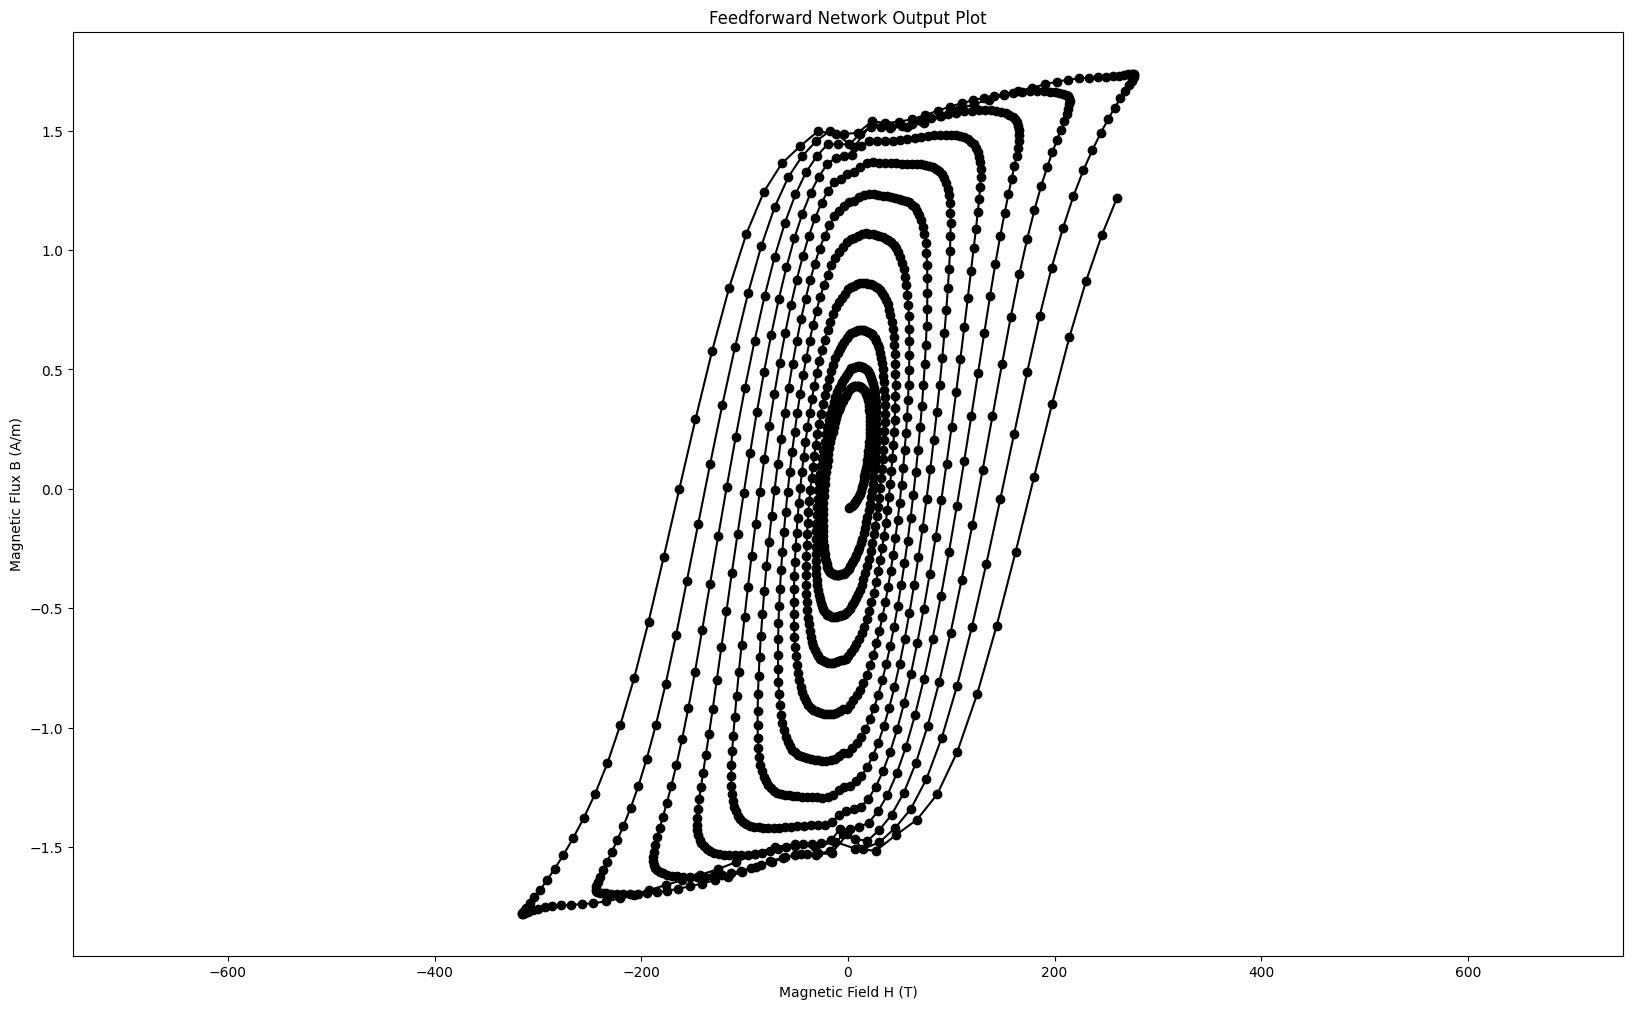

In [15]:
# Plot feedforward output
plot_predicted(test_next_h, feedforward_prediction, "Feedforward Network")

## Preisach Network

In [16]:
# Generate and train preisach network
pnn_model = train_and_generate_preisach_network(train_x, train_y, "preisach.model", n_epochs=20)

Epoch 1/20
112/112 [==============================] - 1s 6ms/step - loss: 0.6521 - mean_squared_error: 0.6521
Epoch 2/20
112/112 [==============================] - 0s 4ms/step - loss: 0.5812 - mean_squared_error: 0.5812
Epoch 3/20
112/112 [==============================] - 0s 4ms/step - loss: 0.5559 - mean_squared_error: 0.5559
Epoch 4/20
112/112 [==============================] - 0s 4ms/step - loss: 0.5368 - mean_squared_error: 0.5368
Epoch 5/20
112/112 [==============================] - 0s 4ms/step - loss: 0.5434 - mean_squared_error: 0.5434
Epoch 6/20
112/112 [==============================] - 0s 4ms/step - loss: 0.5278 - mean_squared_error: 0.5278
Epoch 7/20
112/112 [==============================] - 1s 5ms/step - loss: 0.5141 - mean_squared_error: 0.5141
Epoch 8/20
112/112 [==============================] - 1s 5ms/step - loss: 0.5130 - mean_squared_error: 0.5130
Epoch 9/20
112/112 [==============================] - 0s 4ms/step - loss: 0.5148 - mean_squared_error: 0.5148
Epoch 10/2

In [17]:
# Load preisach model
pnn_model = tf.keras.models.load_model("./models/preisach.model")

In [18]:
#Evaluate preisach model
pnn_prediction = pnn_model.predict(test_x)
mse = compute_mse(test_y, pnn_prediction)
print("MSE: " + str(mse))

# tensorflow evaluation
pnn_model.evaluate(test_x, test_y)

38/38 [==============================] - 0s 3ms/step
MSE: 1.8344557602979217
38/38 [==============================] - 0s 4ms/step - loss: 0.5248 - mean_squared_error: 0.5248


[0.5248175263404846, 0.5248175263404846]

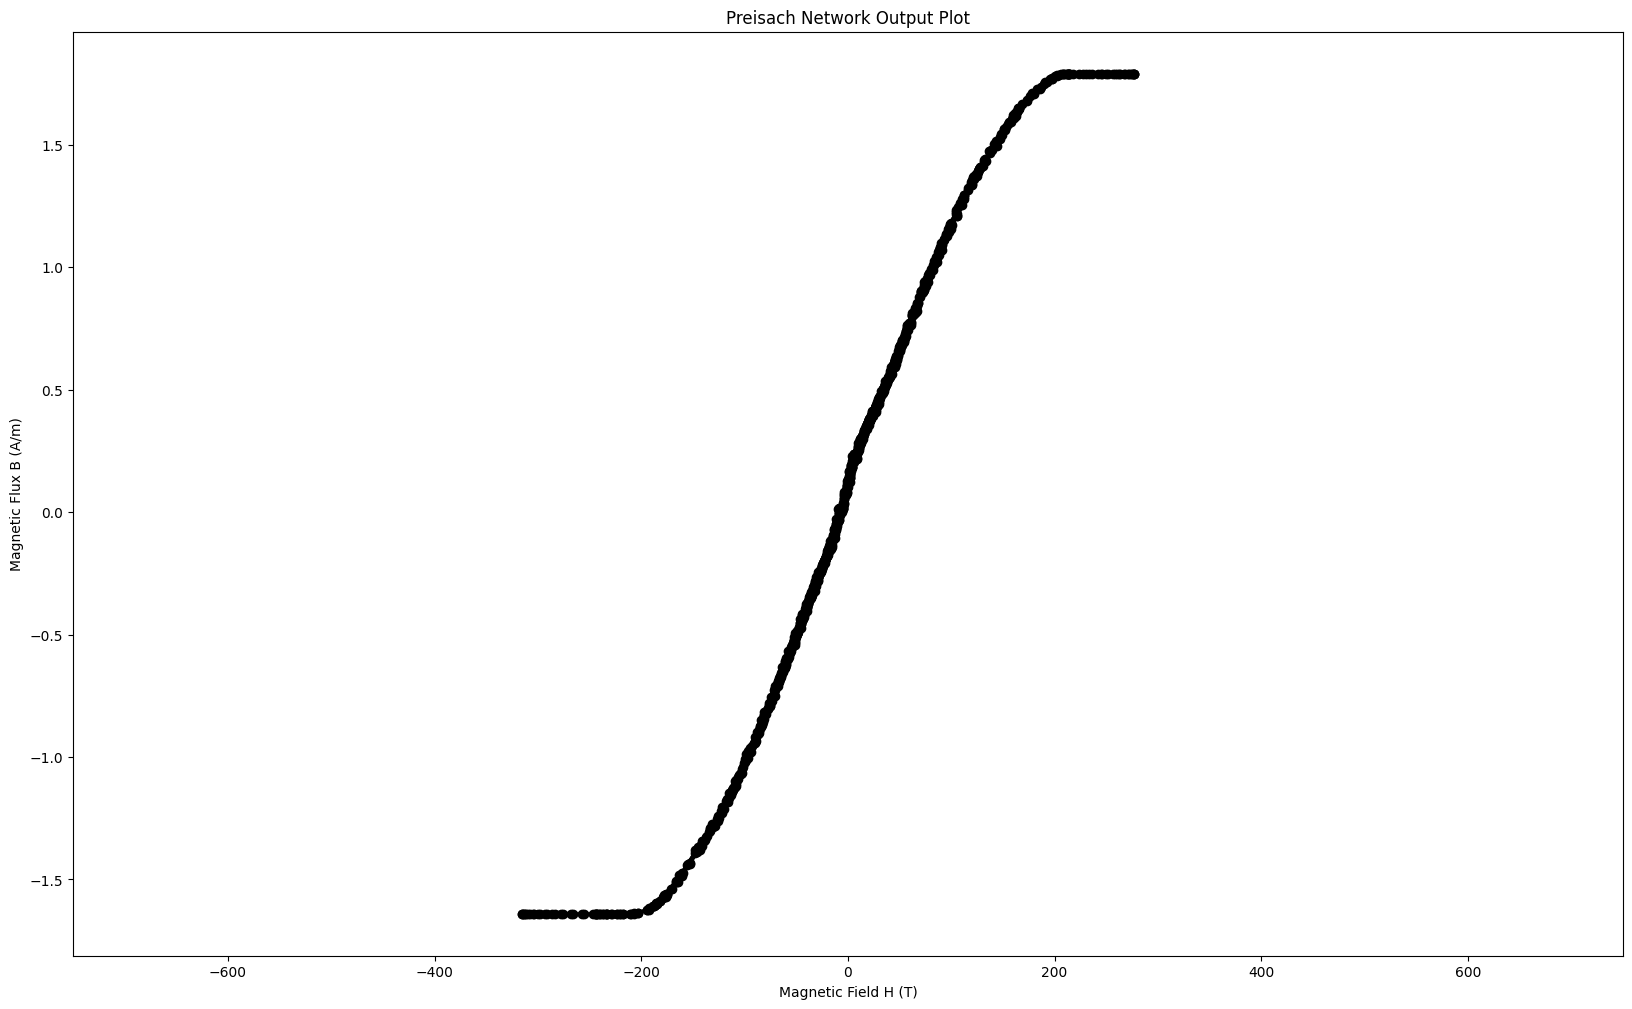

In [19]:
# Plot Preisach output
plot_predicted(test_next_h, pnn_prediction, "Preisach Network")

## Recurrent Network
no stop activation layer

In [ ]:
# Generate and train recurrent network (no stop operator)
rnn_model = train_and_generate_recurrent_network(train_x, train_y, "recurrent.model", n_epochs=20)

Epoch 1/20


In [ ]:
# Load recurrent network
rnn_model = tf.keras.models.load_model("./models/recurrent.model")

In [ ]:
# Evaluate recurrent model
rnn_prediction = rnn_model.predict(test_x)
mse = compute_mse(test_y, rnn_prediction)
print("MSE: " + str(mse))

# tensorflow evaluation
rnn_model.evaluate(test_x, test_y)

In [ ]:
plot_predicted(test_next_h, rnn_prediction, "Recurrent LSTM network")